# 🌾 Farm of Life – A Conway’s Game of Life Simulation 🌱

## **Introduction**
**Farm of Life** is an interactive adaptation of **Conway’s Game of Life**, set in a cozy, farm-like environment. Instead of abstract grid cells, the simulation features:
- 🌾 **Wheat and flowers** representing living cells  
- 🚜 **A farmer agent** tending to the crops  
- 🏡 **A farm-like setting** instead of a traditional grid  

The game evolves based on **cellular automata rules**, with the added complexity of an **AI agent** trained to optimize the farm’s growth.

---

## **How It Works**
1. **Conway’s Rules Applied to a Farm:**
   - 🌱 **Alive cells** (wheat/flowers) follow classic birth/survival rules.
   - 🍂 **Dead cells** become empty soil but can regrow under the right conditions.

2. **Farmer Agent (Reinforcement Learning)**
   - 🚜 The **AI-controlled farmer** learns to **maximize growth**.
   - 🧠 Trained using **Deep Q-Learning (DQN), PPO, and A2C**.

---



In [9]:

from game_of_life import FarmLifeEnv, train_agent, evaluate_agent, evaluate_random_agent
import os
import seaborn as sns
from stable_baselines3 import PPO, A2C, DQN
import pandas as pd 

# Create the environment
env = FarmLifeEnv()

algorithms = ['PPO', 'A2C', 'DQN']
results = {}
for algo in algorithms:
    model_path = f"./models/{algo.lower()}_farm_life"
    print(model_path)
    if not os.path.exists(model_path + ".zip"):
        print(f"Training new model with {algo}...")
        model = train_agent(env, algorithm=algo, total_timesteps=50000, save_path=model_path)
    else:
        model = globals()[algo].load(model_path)
    
    
    print(f"Evaluating {algo} agent...")
    mean_reward, std_reward = evaluate_agent(env, model)
    results[algo] = (mean_reward, std_reward)

print("Evaluating random agent...")
mean_reward, std_reward = evaluate_random_agent(env)
results['Random'] = (mean_reward, std_reward)

print("Results:")
for algo, (mean_reward, std_reward) in results.items():
    print(f"{algo}: Mean Reward = {mean_reward}, Std Reward = {std_reward}")


# # Plot results
# sns.set_theme(style="whitegrid")
# ax = sns.barplot(x=list(results.keys()), y=[r[0] for r in results.values()], errorbar=[r[1] for r in results.values()])
# ax.set_title("Farm Life - Performance Comparison")
# ax.set_ylabel("Mean Reward")



./models/ppo_farm_life
Evaluating PPO agent...
./models/a2c_farm_life
Evaluating A2C agent...
./models/dqn_farm_life
Evaluating DQN agent...
Evaluating random agent...
Results:
PPO: Mean Reward = 19.43530864197531, Std Reward = 12.511720049893977
A2C: Mean Reward = 18.27814814814816, Std Reward = 11.57201837941728
DQN: Mean Reward = 21.05925925925926, Std Reward = 11.833926387632486
Random: Mean Reward = 12.002716049382718, Std Reward = 9.30072076436971


In [10]:
import pandas as pd
df = pd.DataFrame(results, index=['Mean Reward', 'Std Reward'])
df.head()

,PPO,A2C,DQN,Random
Mean Reward,19.435309,18.278148,21.059259,12.002716
Std Reward,12.511720,11.572018,11.833926,9.300721


Text(0, 0.5, 'Mean Reward')

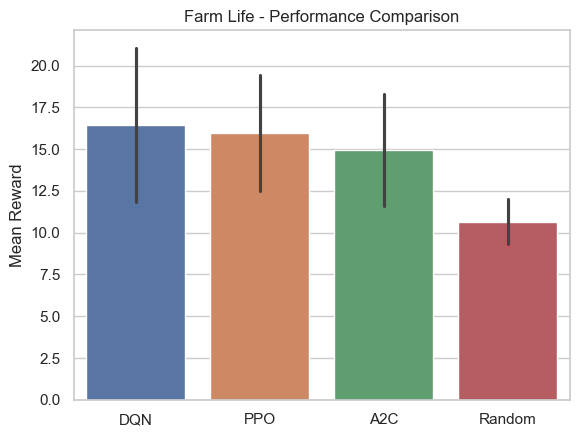

In [11]:
sns.set_theme(style="whitegrid")
ax=sns.barplot(df.sort_values(by='Mean Reward', axis=1, ascending=False))
ax.set_title("Farm Life - Performance Comparison")
ax.set_ylabel("Mean Reward")


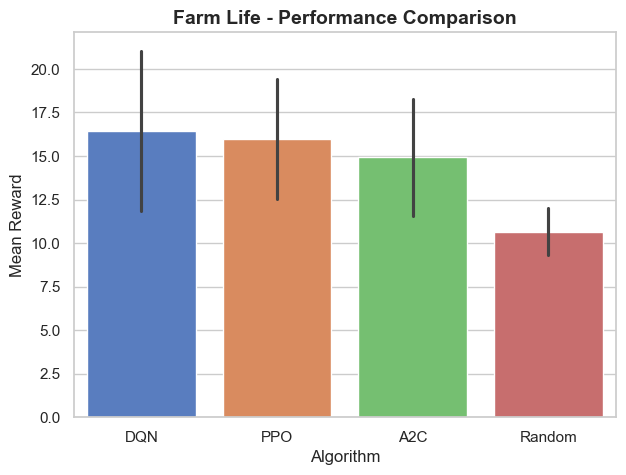

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="whitegrid")

# Define colors and figure size
plt.figure(figsize=(7,5))

# Create barplot
ax = sns.barplot(df.sort_values(by='Mean Reward', axis=1, ascending=False), palette="muted")

# Labels and title
ax.set_title("Farm Life - Performance Comparison", fontsize=14, fontweight="bold")
ax.set_ylabel("Mean Reward", fontsize=12)
ax.set_xlabel("Algorithm", fontsize=12)

# Increase font size for x-axis labels
plt.xticks(fontsize=11)

# Show plot
plt.show()



## Run the Game

### Trained Environment or Random Agent

Run the following cell and choose an algorithm for the environment:

- **PPO** – Proximal Policy Optimization (trained agent)
- **A2C** – Advantage Actor-Critic (trained agent)
- **DQN** – Deep Q-Network (trained agent)
- **Random Agent** – An untrained agent that makes random choices

Select an option from the dropdown to proceed.


In [8]:
import ipywidgets as widgets
from IPython.display import display, Markdown

# Markdown text
md_text = "## Please choose a model for the environment"

# Dropdown widget
algorithm_selector = widgets.Dropdown(
    options=["PPO", "A2C", "DQN", "Random Agent"],
    value="PPO",
    description="Algorithm:",
    style={"description_width": "initial"}
)

# Function to update the selected algorithm
def update_algorithm(change):
    global algorithm
    algorithm = change["new"]

algorithm = algorithm_selector.value
algorithm_selector.observe(update_algorithm, names="value")

# Display Markdown and the widget together
display(Markdown(md_text))
display(algorithm_selector)



## Please choose a model for the environment

Dropdown(description='Algorithm:', options=('PPO', 'A2C', 'DQN', 'Random Agent'), style=DescriptionStyle(descr…

In [7]:
from game_of_life import run_trained_agent, run_random_agent, FarmLifeEnv

env = FarmLifeEnv()

algorithm = algorithm
if algorithm != 'Random Agent':
    run_trained_agent(env, algorithm=algorithm, model_path=f"./models/{algorithm.lower()}_farm_life.zip")
else:
    run_random_agent(env)